# 姓名：
# 时间：
# 题目：


# 用神经网络来学习XOR函数迭代版

## 先复习一下如何对超越方程求数值解

[ -1.00000000e+00  -8.00000000e-01  -6.00000000e-01  -4.00000000e-01
  -2.00000000e-01  -2.22044605e-16   2.00000000e-01   4.00000000e-01
   6.00000000e-01   8.00000000e-01   1.00000000e+00   1.20000000e+00
   1.40000000e+00   1.60000000e+00   1.80000000e+00   2.00000000e+00
   2.20000000e+00   2.40000000e+00   2.60000000e+00   2.80000000e+00
   3.00000000e+00   3.20000000e+00   3.40000000e+00   3.60000000e+00
   3.80000000e+00   4.00000000e+00   4.20000000e+00   4.40000000e+00
   4.60000000e+00   4.80000000e+00] [  4.           3.4872136    2.79245553   2.13459667   1.53442719   1.
   0.53544512   0.14321596  -0.17508894  -0.41835921  -0.58578644
  -0.6767603   -0.69080666  -0.62754845  -0.48667995  -0.26794919
   0.02885438   0.40390889   0.8573666    1.38935887   2.           2.68939015
   3.4576177    4.30476106   5.23089023   6.23606798   7.32035085
   8.48379001   9.72643191  11.04831892]


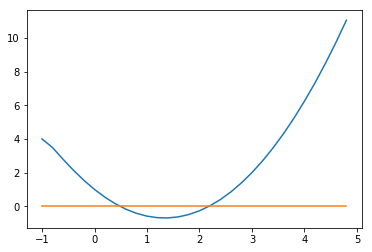

x,y,y1,yh
0.5
-0.0252551286084
2.1824
-0.00040199032178


In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

x=np.arange(-1,5,0.2)

y=x*x+np.sqrt(x+1)-3*x

y0=(x+x)*0

print(x,y)

plt.plot(x,y)
plt.plot(x,y0)

plt.show()

print("x,y,y1,yh")

x=0.5
print(x)
yl=x*x+np.sqrt(x+1)-3*x
print(yl)

x=2.1824
print(x)
yh=x*x+np.sqrt(x+1)-3*x
print(yh)




# 定义一个sigmoid函数，当deriv为True时，返回sigmoid函数的导数

In [2]:
def nonlin(x, deriv=False):  
    if(deriv==True):
        return (x*(1-x))
    
    return 1/(1+np.exp(-x))

# 1/(1+exp(-x)) 导数推导

(1/(1+exp(-x)))'=((1+exp(-x))^-1)'=(-1)((1+exp(-x))^-2)(1+exp(-x))'=(-1)((1+exp(-x))^-2)(exp(-x))'
而(exp(-x))'可以先转成(exp(x)^-1)'，于是她又是一个复合函数的求导，即(exp(x)^-1)对exp(x)的导数再乘上exp(x)对x的导数，又基本初等函数求导公式告诉我们，(exp(x))'=exp(x)，所以(exp(-x))'=(exp(x)^-1)'=(-1)(exp(x)^-2)(exp(x))'=(-1)(exp(x)^-2)exp(x)=(-1)(exp(x)^-1)=(-1)exp(-x)
那么：
(-1)((1+exp(-x))^-2)(exp(-x))'=(-1)((1+exp(-x))^-2)(-1)exp(-x)=exp(-x)((1+exp(-x))^-2)=exp(-x)/((1+exp(-x))^2) 

![](dsigmoid.png)


# 画出nonlin函数的图形

[  4.53978687e-05   3.35350130e-04   2.47262316e-03   1.79862100e-02
   1.19202922e-01   5.00000000e-01   8.80797078e-01   9.82013790e-01
   9.97527377e-01   9.99664650e-01]


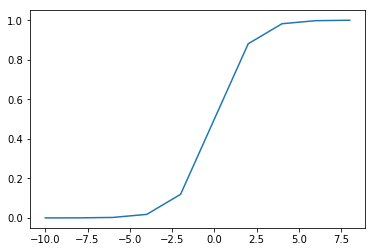

In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

x=np.arange(-10,10,2)
y=nonlin(x)
print(y)
plt.plot(x,y)
plt.show()


# 画出导数的图形

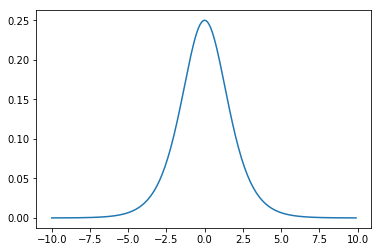

In [4]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

x=np.arange(-10,10,0.1)
y=1/(1+np.exp(-x))
yderiv=nonlin(y,deriv=True)
plt.plot(x,yderiv)
plt.show()


# 复习一下表格试凑法

![](weights_solution.png)

![](BPBSYN0SYN1.png)

In [5]:
syn0=np.array([[-10,-20,20,20],
              [-10,20,-20,20],
              [10,0.2,-1,-20]])
print(syn0)

syn1=np.array([[0],
              [1.0],
              [1.0],
              [0]])



[[-10.  -20.   20.   20. ]
 [-10.   20.  -20.   20. ]
 [ 10.    0.2  -1.  -20. ]]


In [6]:
#input data
xinputs = np.array([[0,0,1], 
            [0,1,1],
            [1,0,1],
            [1,1,1]])
l0=xinputs

# 计算第一层的线性输出


In [7]:
SO1=np.dot(xinputs,syn0)
print(SO1)

[[ 10.    0.2  -1.  -20. ]
 [  0.   20.2 -21.    0. ]
 [  0.  -19.8  19.    0. ]
 [-10.    0.2  -1.   20. ]]


# 所有可能的输入值放在一个向量中

In [8]:
l1=nonlin(SO1)
print(l1)

[[  9.99954602e-01   5.49833997e-01   2.68941421e-01   2.06115362e-09]
 [  5.00000000e-01   9.99999998e-01   7.58256042e-10   5.00000000e-01]
 [  5.00000000e-01   2.51749871e-09   9.99999994e-01   5.00000000e-01]
 [  4.53978687e-05   5.49833997e-01   2.68941421e-01   9.99999998e-01]]


In [9]:

SO2=np.dot(l1,syn1)
print(SO2)

[[ 0.81877542]
 [ 1.        ]
 [ 1.        ]
 [ 0.81877542]]


In [10]:
l2=nonlin(SO2)
print(l2)

[[ 0.69397633]
 [ 0.73105858]
 [ 0.73105858]
 [ 0.69397633]]


# 希望的的输出结果

In [11]:
#output data
y = np.array([[0],
             [1],
             [1],
             [0]])

# 误差是

In [12]:
l2_error=y-l2
print(l2_error)

[[-0.69397633]
 [ 0.26894142]
 [ 0.26894142]
 [-0.69397633]]


# 为了直观地得出总误差多大，引入绝对值平均值lmabs

In [13]:
#误差的平均绝对为
lms=np.mean(np.abs(l2_error))
print(lms)

sk=[]
yerrorlmss=[]
syn1_0=[]
sks=0

syn1_0.append(syn1[0,0])
sk.append(sks)
yerrorlmss.append(lms)
sks=sks+1


0.481458877718


# 误差反向传播

![](syn01delta.png)

# 利用误差修正第二层权值网络

In [14]:
l2_delta = l2_error*nonlin(l2, deriv=True)

In [15]:
print(l2_delta)

[[-0.14738196]
 [ 0.05287709]
 [ 0.05287709]
 [-0.14738196]]


# 计算第一层的误差

In [16]:
print(syn1)

[[ 0.]
 [ 1.]
 [ 1.]
 [ 0.]]


In [17]:
print(syn1.T)

[[ 0.  1.  1.  0.]]


In [18]:
l1_error = l2_delta.dot(syn1.T)
print(l1_error)

[[ 0.         -0.14738196 -0.14738196  0.        ]
 [ 0.          0.05287709  0.05287709  0.        ]
 [ 0.          0.05287709  0.05287709  0.        ]
 [ 0.         -0.14738196 -0.14738196  0.        ]]


# 计算第一层的修正值

In [19]:
l1_delta = l1_error * nonlin(l1,deriv=True)
print(l1_delta)

[[  0.00000000e+00  -3.64794782e-02  -2.89770525e-02   0.00000000e+00]
 [  0.00000000e+00   8.92316747e-11   4.00943751e-11   0.00000000e+00]
 [  0.00000000e+00   1.33118013e-10   2.96259587e-10   0.00000000e+00]
 [  0.00000000e+00  -3.64794782e-02  -2.89770525e-02   0.00000000e+00]]


# 修正权值网络

In [20]:
syn1 += l1.T.dot(l2_delta)
syn0 += l0.T.dot(l1_delta)    

In [21]:
print(syn0)
print(syn1)

[[-10.         -20.03647948  19.97102295  20.        ]
 [-10.          19.96352052 -20.02897705  20.        ]
 [ 10.           0.12704104  -1.0579541  -20.        ]]
[[-0.09450487]
 [ 0.89080587]
 [ 0.97360286]
 [-0.09450487]]


![](syn01delta.png)

# 机器迭代最终答案

In [22]:
for j in range(50):  
    
    print("start forward calulate")
    l0 = xinputs
    print("l0")
    print(l0)    
    l1 = nonlin(np.dot(l0, syn0))
    print("l1")
    print(l1)
    l2 = nonlin(np.dot(l1, syn1))
    print("l2")
    print(l2)
    
    # Back propagation of errors using the chain rule. 
    l2_error = y - l2
    
    print("l2")
    print(l2)
    
    print("l2_error")
    print(l2_error)
    
    lms=np.mean(np.abs(l2_error))
    syn1_0.append(syn1[0,0])
    sk.append(sks)
    yerrorlmss.append(lms)
    sks=sks+1
    
    print("Error:")
    print(lms)
        
    l2_delta = l2_error*nonlin(l2, deriv=True)
    
    print("nonline derive")
    print(nonlin(l2,deriv=True))
    
    print("l2_delta")      
    print(l2_delta)
          
    l1_error = l2_delta.dot(syn1.T)
    
    print("syn1.T")
    print(syn1.T)
    
    print("l1_error")
    print(l1_error)
    
    l1_delta = l1_error * nonlin(l1,deriv=True)
    
    print("nonlin(l1,deriv=True)")
    print(nonlin(l1,deriv=True))
        
    
    #update weights (no learning rate term)
    syn1 += l1.T.dot(l2_delta)
    syn0 += l0.T.dot(l1_delta)
    
    print("syn0 syn1")
    
    print(syn0)
    print(syn1)
    
print("Output after training")
print(l2)

print(syn1_0)
print(yerrorlmss)
   

start forward calulate
l0
[[0 0 1]
 [0 1 1]
 [1 0 1]
 [1 1 1]]
l1
[[  9.99954602e-01   5.31717614e-01   2.57700622e-01   2.06115362e-09]
 [  5.00000000e-01   9.99999998e-01   6.95123799e-10   5.00000000e-01]
 [  5.00000000e-01   2.25652812e-09   9.99999994e-01   5.00000000e-01]
 [  4.53978687e-05   5.13517227e-01   2.46771057e-01   9.99999998e-01]]
l2
[[ 0.65250185]
 [ 0.68918267]
 [ 0.70663527]
 [ 0.64638625]]
l2
[[ 0.65250185]
 [ 0.68918267]
 [ 0.70663527]
 [ 0.64638625]]
l2_error
[[-0.65250185]
 [ 0.31081733]
 [ 0.29336473]
 [-0.64638625]]
Error:
0.475767540346
nonline derive
[[ 0.22674318]
 [ 0.21420992]
 [ 0.20730187]
 [ 0.22857107]]
l2_delta
[[-0.14795035]
 [ 0.06658015]
 [ 0.06081506]
 [-0.14774519]]
syn1.T
[[-0.09450487  0.89080587  0.97360286 -0.09450487]]
l1_error
[[ 0.01398203 -0.13179504 -0.14404488  0.01398203]
 [-0.00629215  0.05930999  0.06482263 -0.00629215]
 [-0.00574732  0.05417441  0.05920971 -0.00574732]
 [ 0.01396264 -0.13161229 -0.14384514  0.01396264]]
nonlin(l1,

 [ 0.2264597 ]]
l2
[[ 0.2388408 ]
 [ 0.77048002]
 [ 0.81351987]
 [ 0.2264597 ]]
l2_error
[[-0.2388408 ]
 [ 0.22951998]
 [ 0.18648013]
 [-0.2264597 ]]
Error:
0.220325152813
nonline derive
[[ 0.18179587]
 [ 0.17684056]
 [ 0.15170529]
 [ 0.1751757 ]]
l2_delta
[[-0.04342027]
 [ 0.04058844]
 [ 0.02829002]
 [-0.03967024]]
syn1.T
[[-1.78524879  1.80736685  2.15725712 -1.47021942]]
l1_error
[[ 0.07751599 -0.07847636 -0.09366869  0.06383733]
 [-0.07246047  0.0733582   0.0875597  -0.05967391]
 [-0.05050473  0.05113045  0.06102885 -0.04159254]
 [ 0.07082124 -0.07169867 -0.0855789   0.05832395]]
nonlin(l1,deriv=True)
[[  1.21551740e-04   1.74147143e-01   9.16096112e-02   8.49174502e-10]
 [  1.42834205e-01   1.27960488e-08   1.47645046e-10   1.57574972e-01]
 [  1.59801654e-01   3.32005147e-10   2.87741033e-08   1.73230509e-01]
 [  6.32914637e-06   7.54571028e-02   4.13467674e-02   1.21433128e-08]]
syn0 syn1
[[-10.4113583  -20.59214259  19.53526217  19.63086093]
 [-10.5923213   19.40785743 -20.46473

ValueError: x and y must have same first dimension, but have shapes (200,) and (4, 1)

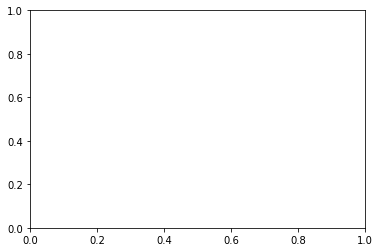

In [23]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

plt.plot(x,y)
plt.show()




# 画出迭代过程中syn1_0值的变化趋势

# 作业：
# 1.画出syn1[0] 的值在迭代过程中与Error的绝对值平均值yerrorlmss的对应关系曲线。
# 2.画出迭代过程中syn1_0的 变化曲线
# 3.画出迭代过程中yerrorlmss的 变化曲线

提示：
1. syn1[0]从0开始，到-4.8315   
2. 声明list,然后append值,变量名syn1_0,yerrorlmss
3. 为了画出横坐标为迭代次数的图，需要创建对应顺序值，list命名为sk，变量名命名为sks，利用append添加每次的顺序值。
4. j循环体内以及j循环体前面的初始值均需要考虑



ValueError: x and y must have same first dimension, but have shapes (10,) and (4, 1)

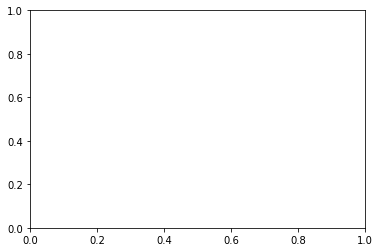

In [41]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt


plt.plot(x,y)
plt.show()


# 画出迭代过程中，yerrorlms变化趋势

ValueError: x and y must have same first dimension, but have shapes (10,) and (4, 1)

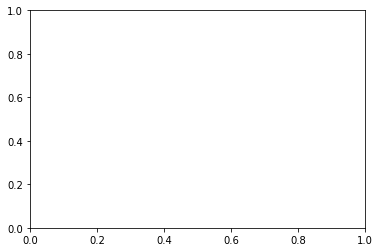

In [42]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt


plt.plot(x,y)
plt.show()


# 作业：修改迭代次数，根据yerrolms的趋势，确定迭代次数的最佳值